In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
PLOTS_PATH = 'C:/Users/jrath/Pictures/Plots/' # output directory for plots
import pandas as pd

## Accuracy Matrices

In [41]:
accuracy_matrix_og = np.array([
    [33.4, 36.4, 36.6, 40.9, 40.0], # 1 users, 1, 5, 10, 30, 50 reps
    [43.3, 60.2, 63.5, 66.7, 69.6], # 5 users, 1, 5, 10, 30, 50 reps
    [60.4, 75.2, 77.6, 80.1, 80.5], # 20 users, 1, 5, 10, 30, 50 reps
    [73.6, 81.6, 83.5, 85.9, 86.7], # 50 users, 1, 5, 10, 30, 50 reps
    [78.7, 87.4, 88.4, 90.1, 88.4], # 150 users, 1, 5, 10, 30, 50 reps
    [84.3, 88.8, 89.6, 91.1, 92.5], # 300 users, 1, 5, 10, 30, 50 reps
])

accuracy_matrix_lstm = np.array([
    [31.283, 31.64, 32.704, 32.904, 33.542], # 1 users, 1, 5, 10, 30, 50 reps
    [36.301, 38.563, 41.019, 43.209, 49.956], # 5 users, 1, 5, 10, 30, 50 reps
    [41.297, 48.792, 54.841, 73.558, 77.553], # 20 users, 1, 5, 10, 30, 50 reps
    [44.077, 62.134, 71.733, 82.923, 84.586], # 50 users, 1, 5, 10, 30, 50 reps
    [52.14, 81.493, 85.738, 88.605, 89.513], # 150 users, 1, 5, 10, 30, 50 reps
    [68.395, 85.746, 88.786, 91.165, 91.507], # 300 users, 1, 5, 10, 30, 50 reps
])

accuracy_matrix_lstm_final = np.array([
    [31.125, 30.761, 31.806, 32.835, 32.738], # 1 users, 1, 5, 10, 30, 50 reps
    [35.986, 38.854, 39.426, 40.248, 51.322], # 5 users, 1, 5, 10, 30, 50 reps
    [38.105, 40.703, 54.886, 69.929, 76.521], # 20 users, 1, 5, 10, 30, 50 reps
    [40.673, 59.453, 69.066, 82.905, 84.329], # 50 users, 1, 5, 10, 30, 50 reps
    [46.036, 81.229, 85.226, 88.26, 89.244], # 150 users, 1, 5, 10, 30, 50 reps
    [63.89, 85.735, 88.196, 90.704, 91.341], # 300 users, 1, 5, 10, 30, 50 reps
])

accuracy_matrix_lstm = accuracy_matrix_lstm_final

difference_matrix_og_lstm = accuracy_matrix_lstm - accuracy_matrix_og

accuracy_matrix_lstm_pretrained = np.array([
    [28.499, 28.992, 31.127, 31.566, 33.946], # 1 users, 1, 5, 10, 30, 50 reps
    [34.863, 40.919, 43.502, 45.04, 56.465], # 5 users, 1, 5, 10, 30, 50 reps
    [41.12, 52.2, 62.223, 76.307, 78.63], # 20 users, 1, 5, 10, 30, 50 reps
    [52.896, 69.976, 78.753, 83.959, 85.008], # 50 users, 1, 5, 10, 30, 50 reps
    [57.382, 84.301, 86.38, 88.85, 89.739], # 150 users, 1, 5, 10, 30, 50 reps
    [74.51, 86.846, 89.09, 91.246, 91.733], # 300 users, 1, 5, 10, 30, 50 reps
])

difference_matrix_lstm = accuracy_matrix_lstm_pretrained - accuracy_matrix_lstm

accuracy_matrix_cnnlstm = np.array([
    [27.644, 30.243, 29.513, 30.792, 29.98], # 1 users, 1, 5, 10, 30, 50 reps
    [29.916, 32.077, 32.903, 33.182, 35.661], # 5 users, 1, 5, 10, 30, 50 reps
    [31.933, 33.726, 34.493, 44.741, 58.395], # 20 users, 1, 5, 10, 30, 50 reps
    [33.262, 34.759, 36.006, 68.641, 82.049], # 50 users, 1, 5, 10, 30, 50 reps
    [35.186, 40.911, 62.666, 90.261, 91.532], # 150 users, 1, 5, 10, 30, 50 reps
    [34.244, 64.353, 87.147, 93.0, 93.802], # 300 users, 1, 5, 10, 30, 50 reps
])

accuracy_matrix_cnnlstm_tuned = np.array([
    [30.079, 31.269, 30.595, 31.957, 31.56], # 1 users, 1, 5, 10, 30, 50 reps
    [32.529, 34.839, 36.705, 37.717, 46.111], # 5 users, 1, 5, 10, 30, 50 reps
    [34.87, 39.084, 43.964, 72.227, 77.236], # 20 users, 1, 5, 10, 30, 50 reps
    [37.873, 47.312, 62.468, 82.428, 86.063], # 50 users, 1, 5, 10, 30, 50 reps
    [41.813, 75.178, 84.381, 90.838, 92.082], # 150 users, 1, 5, 10, 30, 50 reps
    [51.018, 84.93, 90.51, 93.501, 94.05], # 300 users, 1, 5, 10, 30, 50 reps
])

accuracy_matrix_cnnlstm_final = np.array([
    [28.075, 29.177, 29.137, 30.182, 29.991], # 1 users, 1, 5, 10, 30, 50 reps
    [29.116, 31.482, 33.332, 34.847, 42.575], # 5 users, 1, 5, 10, 30, 50 reps
    [31.299, 35.379, 38.193, 54.52, 72.361], # 20 users, 1, 5, 10, 30, 50 reps
    [33.187, 40.615, 43.621, 75.399, 84.5], # 50 users, 1, 5, 10, 30, 50 reps
    [37.165, 52.917, 79.82, 90.718, 91.89], # 150 users, 1, 5, 10, 30, 50 reps
    [42.65, 75.231, 88.653, 93.975, 93.995], # 300 users, 1, 5, 10, 30, 50 reps
])

accuracy_matrix_cnnlstm_thesis = np.array([
    [32.987, 39.932, 43.539, 46.573, 48.1], # 1 users, 1, 5, 10, 30, 50 reps
    [44.782, 55.337, 56.987, 59.75, 65.991], # 5 users, 1, 5, 10, 30, 50 reps
    [54.569, 64.622, 69.721, 78.718, 80.929], # 20 users, 1, 5, 10, 30, 50 reps
    [65.002, 74.459, 79.773, 86.067, 87.437], # 50 users, 1, 5, 10, 30, 50 reps
    [69.609, 85.622, 88.281, 91.418, 92.268], # 150 users, 1, 5, 10, 30, 50 reps
    [77.892, 89.409, 91.68, 93.455, 93.952], # 300 users, 1, 5, 10, 30, 50 reps
])

accuracy_matrix_cnnlstm = accuracy_matrix_cnnlstm_thesis

accuracy_matrix_cnnlstm_pretrained = np.array([
    [26.471, 29.115, 29.596, 28.909, 29.927], # 1 users, 1, 5, 10, 30, 50 reps
    [30.0, 31.503, 31.98, 33.798, 38.351], # 5 users, 1, 5, 10, 30, 50 reps
    [31.58, 33.877, 36.044, 56.267, 70.456], #20 users, 1, 5, 10, 30, 50 reps
    [33.185, 38.304, 50.678, 79.725, 84.041], # 50 users, 1, 5, 10, 30, 50 reps
    [34.825, 68.944, 81.905, 89.466, 91.057], # 150 users, 1, 5, 10, 30, 50 reps
    [39.875, 82.564, 87.728, 92.273, 93.419], # 300 users, 1, 5, 10, 30, 50 reps
])

accuracy_matrix_cnnlstm_pretrained_tuned = np.array([
    [30.917, 32.582, 33.173, 35.954, 36.963], # 1 users, 1, 5, 10, 30, 50 reps
    [32.752, 34.96, 36.85, 41.994, 50.397], # 5 users, 1, 5, 10, 30, 50 reps
    [35.27, 39.623, 49.123, 69.334, 75.897], #20 users, 1, 5, 10, 30, 50 reps
    [37.714, 57.098, 71.767, 83.005, 85.809], # 50 users, 1, 5, 10, 30, 50 reps
    [46.737, 79.843, 85.151, 89.865, 91.209], # 150 users, 1, 5, 10, 30, 50 reps
    [59.656, 85.803, 89.131, 92.438, 93.342], # 300 users, 1, 5, 10, 30, 50 reps
])

accuracy_matrix_cnnlstm_pretrained_thesis = np.array([
    [30.456 , 31.671, 32.771, 35.44, 38.02], # 1 users, 1, 5, 10, 30, 50 reps
    [31.67, 36.106, 38.025, 45.856, 52.923], # 5 users, 1, 5, 10, 30, 50 reps
    [34.084, 40.271, 51.402, 71.937, 76.532], #20 users, 1, 5, 10, 30, 50 reps
    [36.666, 54.045, 70.628, 82.633, 85.119], # 50 users, 1, 5, 10, 30, 50 reps
    [43.652, 80.098, 85.176, 90.18, 91.405], # 150 users, 1, 5, 10, 30, 50 reps
    [58.37, 85.855, 89.377, 92.578, 93.336], # 300 users, 1, 5, 10, 30, 50 reps
])

accuracy_matrix_cnnlstm_pretrained = accuracy_matrix_cnnlstm_pretrained_thesis

difference_matrix_cnnlstm = accuracy_matrix_cnnlstm_pretrained - accuracy_matrix_cnnlstm

difference_matrix_tuned_final =  accuracy_matrix_cnnlstm_tuned - accuracy_matrix_cnnlstm_final

# Differences between LSTM and CNN-LSTM
difference_matrix_cnnlstm_lstm = accuracy_matrix_cnnlstm - accuracy_matrix_lstm
difference_matrix_cnnlstm_pretrained_lstm_pretrained = accuracy_matrix_cnnlstm_pretrained - accuracy_matrix_lstm_pretrained
difference_matrix_og_cnnlstm = accuracy_matrix_cnnlstm - accuracy_matrix_og

## Plotting definition

In [42]:
def plot_matrix_seaborn(matrix, title, labels, save_path=None, cmap='viridis', difference=False, diff_axis=25):
    plt.figure(figsize=(12, 8))
    if difference:
        minval = -diff_axis
        maxval = diff_axis
    else:
        minval= 30
        maxval= 94
    ax = sns.heatmap(matrix, annot=True, fmt=".1f", cmap=cmap, cbar_kws={'label': 'Accuracy (%)'}, annot_kws={"size": 16}, vmin=minval, vmax=maxval)
    ax.set_title(title, fontsize=18)
    
    # Adjust x and y ticks to center
    ax.set_xticks(np.arange(len(labels['x'])) + 0.5)  # Center ticks
    ax.set_xticklabels(labels['x'])
    ax.set_yticks(np.arange(len(labels['y'])) + 0.5)  # Center ticks
    ax.set_yticklabels(labels['y'])
    
    # Additional adjustments
    ax.set_xlabel("Number of Repetitions per Gesture in Training Set", fontsize=16)
    ax.set_ylabel("Number of Subjects in Training Set", fontsize=16)
    ax.tick_params(axis='x', rotation=0, labelsize=16) 
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=16)
    cbar.set_label('Accuracy (%)', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    if save_path:
        plt.savefig(PLOTS_PATH + save_path, dpi=600, bbox_inches='tight')

    plt.show()

# Labels for axes
labels = {
    'x': ['1', '5', '10', '30', '50'],
    'y': ['1', '5', '20', '50', '150', '300']
}

## Outputs

### EMG

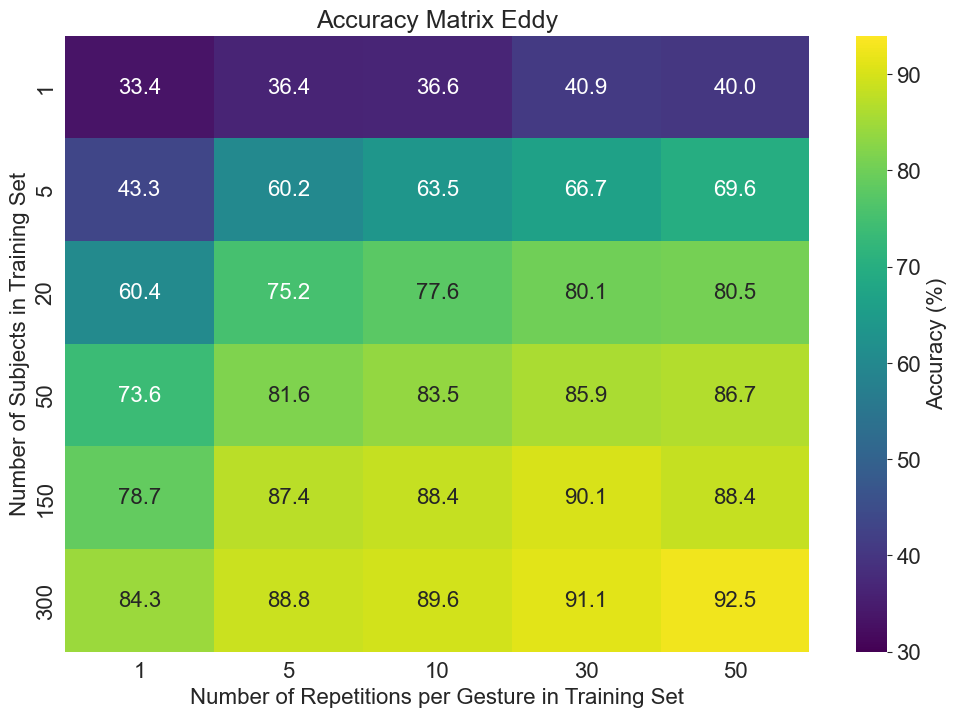

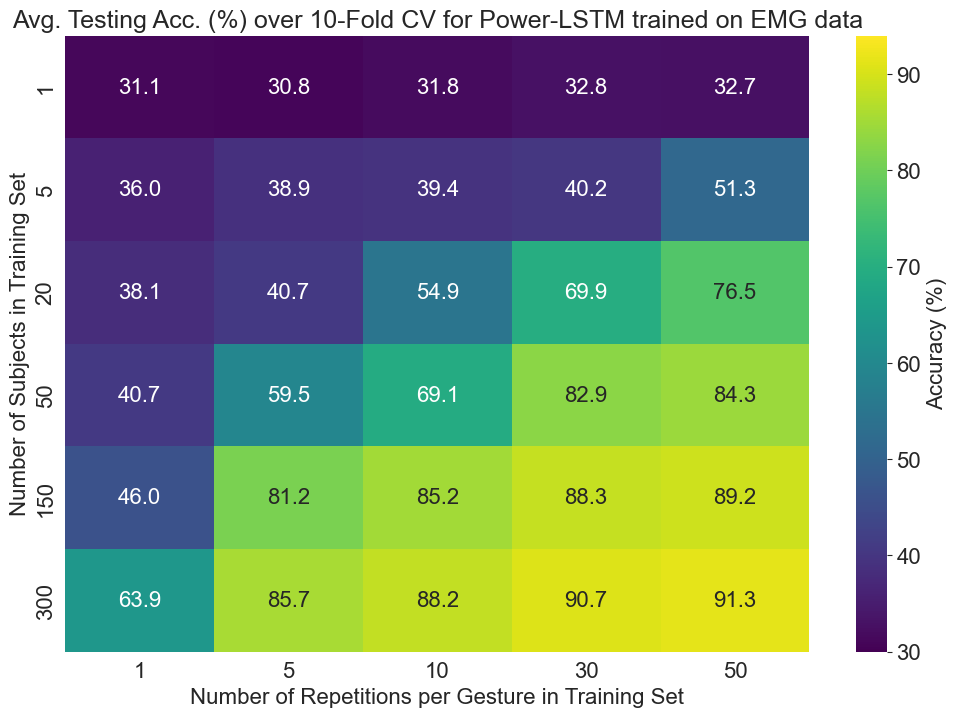

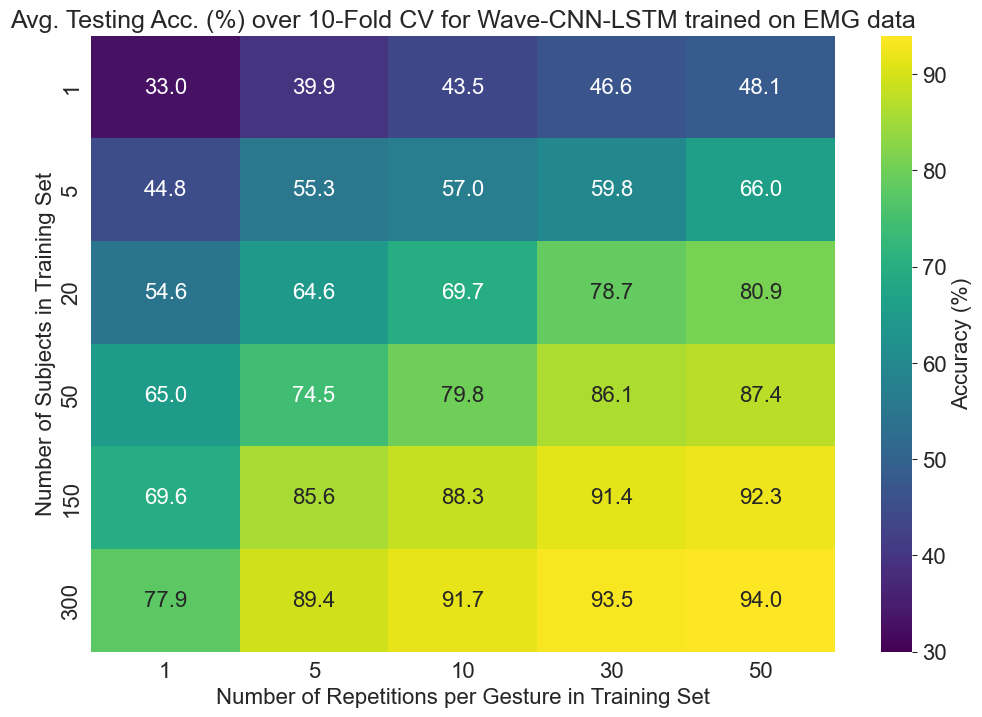

In [43]:
plot_matrix_seaborn(accuracy_matrix_og, "Accuracy Matrix Eddy", labels)
plot_matrix_seaborn(accuracy_matrix_lstm, "Avg. Testing Acc. (%) over 10-Fold CV for Power-LSTM trained on EMG data", labels, 'acc_lstm.png')
plot_matrix_seaborn(accuracy_matrix_cnnlstm, "Avg. Testing Acc. (%) over 10-Fold CV for Wave-CNN-LSTM trained on EMG data", labels, 'acc_cnnlstm.png')

### Pretrained

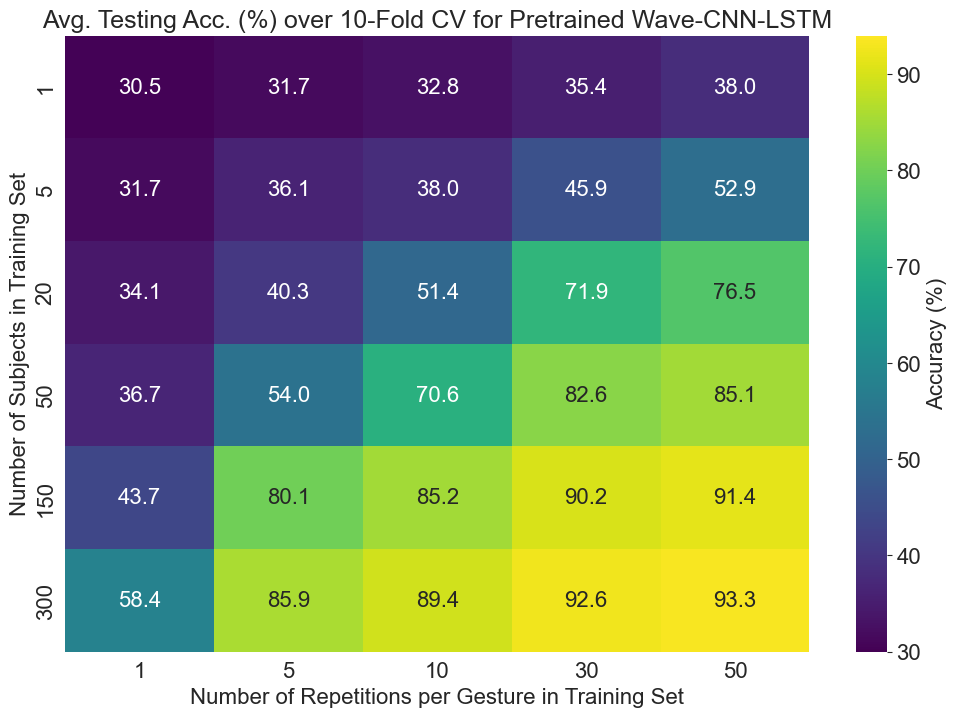

In [44]:
plot_matrix_seaborn(accuracy_matrix_cnnlstm_pretrained, "Avg. Testing Acc. (%) over 10-Fold CV for Pretrained Wave-CNN-LSTM", labels, 'acc_cnnlstm_pretrained.png')

### Difference

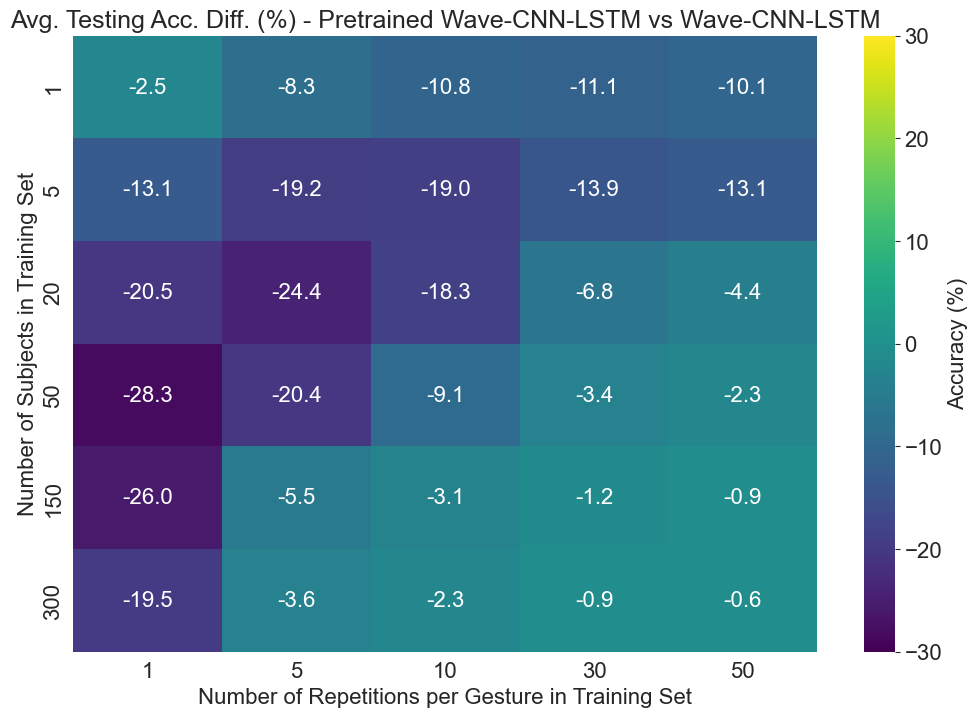

In [45]:
plot_matrix_seaborn(difference_matrix_cnnlstm, "Avg. Testing Acc. Diff. (%) - Pretrained Wave-CNN-LSTM vs Wave-CNN-LSTM", labels, 'cnnlstm_pretrained_cnnlstm.png', difference=True, diff_axis=30)

### Differences between Models

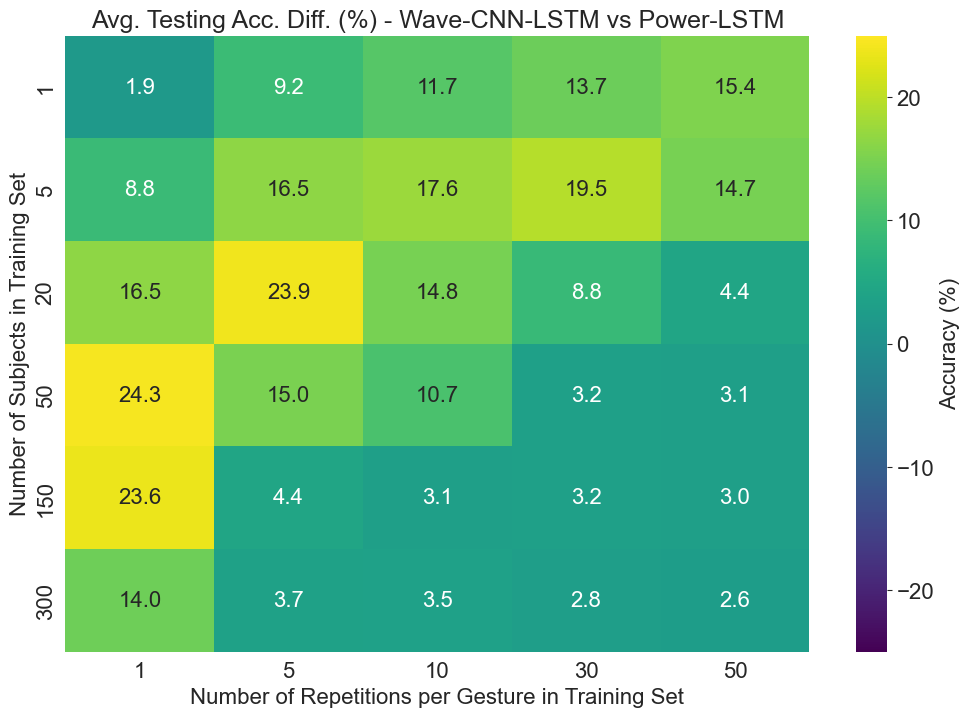

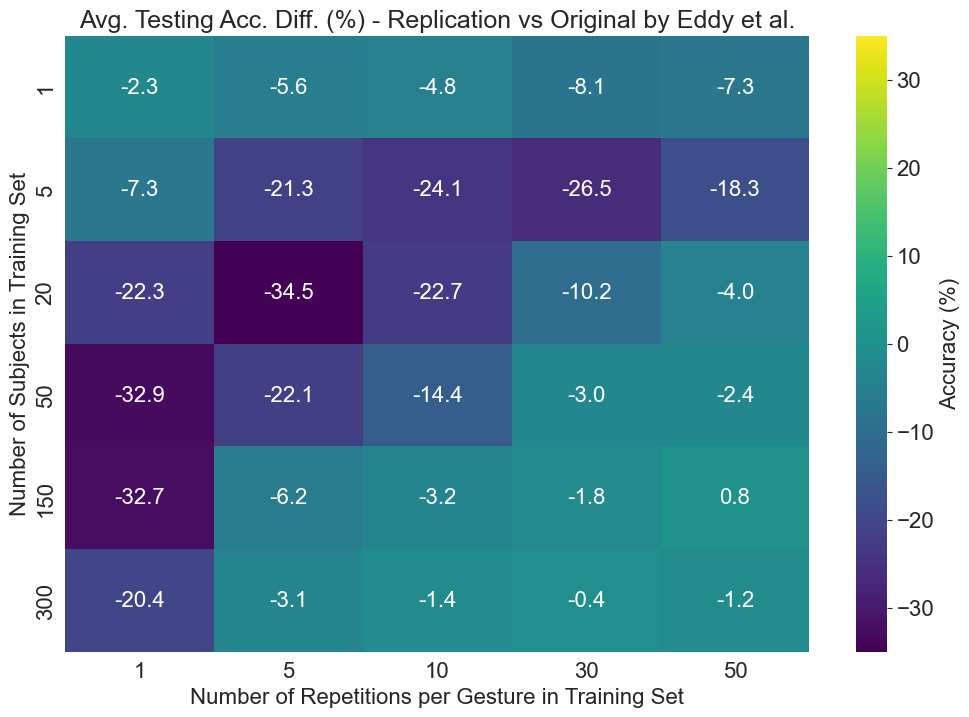

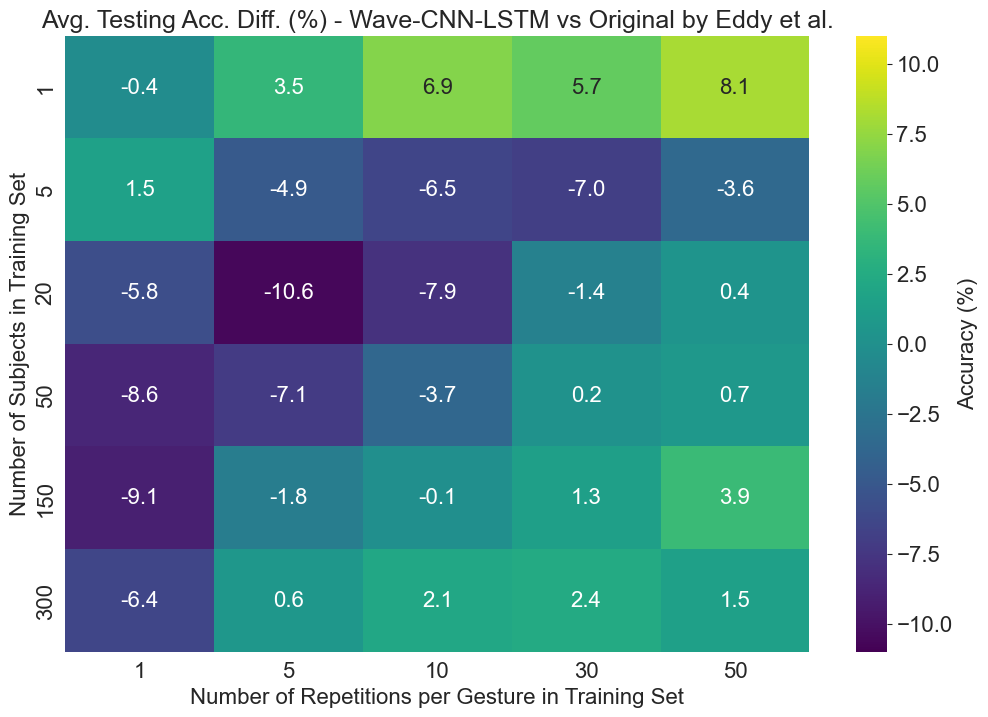

In [46]:
plot_matrix_seaborn(difference_matrix_cnnlstm_lstm, "Avg. Testing Acc. Diff. (%) - Wave-CNN-LSTM vs Power-LSTM", labels, 'cnnlstm_lstm_diff.png', difference=True, diff_axis=25)
plot_matrix_seaborn(difference_matrix_og_lstm, "Avg. Testing Acc. Diff. (%) - Replication vs Original by Eddy et al.", labels, 'lstm_eddy_diff.png', difference=True, diff_axis=35)
plot_matrix_seaborn(difference_matrix_og_cnnlstm, "Avg. Testing Acc. Diff. (%) - Wave-CNN-LSTM vs Original by Eddy et al.", labels, 'cnnlstm_eddy_diff.png', difference=True, diff_axis=11)

## Error Bar Plot

In [47]:
def plot_and_save_model_comparison_with_errors(
    means,
    errors,
    model_names,
    dataset_names,
    save_path,
    title="Model Accuracy Comparison",
    capsize=5
):
    """
    Draws a seaborn barplot of your precomputed means and overlays custom error bars,
    using only Viridis endpoint colors for maximum contrast. Disables vertical grid lines
    and adds horizontal gridlines at every 0.1 on the y-axis.
    Fixes alignment by explicitly positioning error bars.
    """
    # 1. Create a high-resolution Viridis palette
    full_viridis = sns.color_palette("viridis", n_colors=512)
    # 2. Select three contrasting Viridis colors
    manual_colors = [full_viridis[200], full_viridis[350], full_viridis[-1]]
    sns.set_palette(manual_colors)
    
    # Build summary DataFrame
    rows = []
    for model in model_names:
        for i, ds in enumerate(dataset_names):
            rows.append({
                'Dataset': ds,
                'Model': model,
                'Mean': means[model][i]
            })
    df = pd.DataFrame(rows)
    df['Dataset'] = pd.Categorical(df['Dataset'], categories=dataset_names, ordered=True)
    df['Model']   = pd.Categorical(df['Model'],   categories=model_names,   ordered=True)
    
    # Plot bars
    fig, ax = plt.subplots(figsize=(14, 8))
    sns.barplot(
        data=df,
        x='Dataset', y='Mean', hue='Model',
        errorbar=None,
        hue_order=model_names,
        order=dataset_names,
        ax=ax
    )
    
    # Compute positioning
    n_models = len(model_names)
    bar_width = ax.patches[0].get_width()
    xticks = np.arange(len(dataset_names))
    offsets = [(j - (n_models - 1) / 2) * bar_width for j in range(n_models)]
    
    # Overlay error bars with correct errors
    for j, model in enumerate(model_names):
        for i in range(len(dataset_names)):
            x = xticks[i] + offsets[j]
            y = means[model][i]
            err = errors[model][i]
            ax.errorbar(
                x, y,
                yerr=err,
                fmt='none',
                capsize=capsize,
                capthick=1,
                elinewidth=1,
                color='black'
            )
    
    # Styling
    ax.set_title(title, fontsize=18)
    ax.set_ylabel('Accuracy', fontsize=16)
    ax.set_xlabel('Dataset', fontsize=16)
    ax.set_ylim(0, 1)
    ax.set_yticks(np.arange(0, 1.01, 0.1))
    ax.xaxis.grid(False)
    ax.yaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
    ax.legend(title='Model', fontsize=16)
    ax.tick_params(labelsize=16)

    plt.tight_layout()
    plt.savefig(PLOTS_PATH + save_path, dpi=600, bbox_inches='tight')
    plt.show()

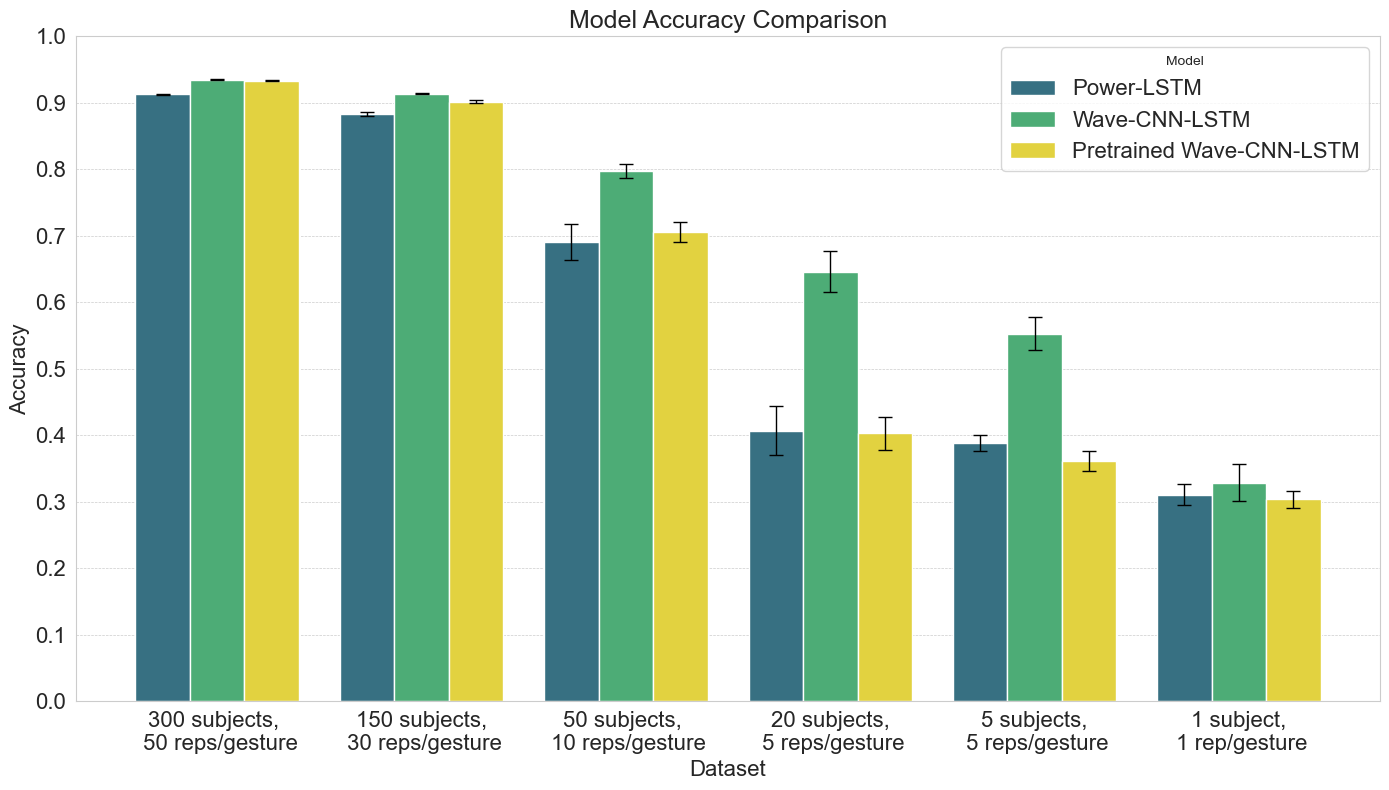

In [49]:
means = {
    'Power-LSTM': [0.913, 0.883, 0.691, 0.407, 0.388, 0.311],
    'Wave-CNN-LSTM': [0.935, 0.914, 0.797, 0.646, 0.553, 0.329],
    'Pretrained Wave-CNN-LSTM': [0.933, 0.902, 0.706, 0.403, 0.361 ,0.304],
}
errors = {
    'Power-LSTM': [0.00063839, 0.0035452, 0.026775, 0.036692, 0.0119125, 0.0159907],
    'Wave-CNN-LSTM': [0.00062847, 0.00130157, 0.0107844, 0.0307666, 0.024265, 0.0273454],
    'Pretrained Wave-CNN-LSTM': [0.00072516, 0.002261, 0.0146458, 0.0247236, 0.0151726, 0.0130095],
}
dataset_names = ['300 subjects, \n 50 reps/gesture',
                  '150 subjects,\n 30 reps/gesture',
                    '50 subjects, \n 10 reps/gesture',
                      '20 subjects,\n 5 reps/gesture',
                        '5 subjects,\n 5 reps/gesture',
                          '1 subject,\n 1 rep/gesture']
model_names   = ['Power-LSTM', 'Wave-CNN-LSTM', 'Pretrained Wave-CNN-LSTM']

plot_and_save_model_comparison_with_errors(
    means, errors, model_names, dataset_names,
    save_path="model_comparison.png",
    title="Model Accuracy Comparison"
)

In [ ]:
import os
import random
import torch
import h5py
def get_emg_data(file_path, sample, location):
    # convert file path to h5 instead of json
    file_path = os.path.splitext(file_path)[0] + '.h5'
    with h5py.File(file_path, 'r') as h5f:
        # Access the EMG group
        sample_data = h5f[location + '/' + str(sample) + '/']
        gestureName = sample_data.attrs['gestureName']
        emg_group = h5f[location + '/' + str(sample) + '/emg']

        # set start and end points (except for noGesture --> endpoint = max length in dataset)
        startingPoint = 0
        endingPoint = 0
        if gestureName != 'noGesture':
            ground_truth_index = sample_data["groundTruthIndex"][:]  
            if ground_truth_index is not None:
                if hasattr(ground_truth_index, "__getitem__"):  # Array-like (e.g., HDF5 dataset)
                    startingPoint = int(ground_truth_index[0])
                    endingPoint = int(ground_truth_index[1])
                else:
                    raise ValueError("groundTruthIndex must be an array-like object.")        
        else:
            endingPoint = 500

        # load channel data for set length
        channels = []
        for channel_name in emg_group.keys():  # Iterate over 'ch1', 'ch2', ...
            channel_data = emg_group[channel_name][startingPoint:endingPoint]
            channels.append(channel_data)
        emg_data = np.array(channels)
    return emg_data

def get_windows_rms(emg_data):
    # calculate number of windows for data length
    num_samples = emg_data.shape[1]
    window_samples = int(0.025 * 200)
    step_samples = int(window_samples * (1 - 0))
    if num_samples < window_samples:
        num_windows = 1
    else:
        num_windows = (num_samples - window_samples) // step_samples + 1

    rms_windows = []    
    for i in range(num_windows):
        # calculate start and end point for window
        start = i * step_samples
        end = start + window_samples
        
        # zero-pad window if it's longer than remaining data
        if end > num_samples:
            segment = np.pad(emg_data, ((0, 0), (0, end - num_samples)), mode='constant')
        else:
            segment = emg_data[:, start:end]
        # make sure window has correct length
        segment = segment[:, :window_samples]
        # Compute RMS for each channel in the window
        rms_feature = np.sqrt(np.mean(np.square(segment), axis=1))  
        rms_windows.append(rms_feature)
    windows_np = np.array(rms_windows) 

    # pad array of window to max number of windows in dataset to have consistent shapes
    # pad_size = self.max_windows - len(windows_np)
    # if pad_size > 0:
    #     padding = np.zeros((pad_size, windows_np.shape[1]))  # Pad with zeros
    #     windows_np = np.vstack((windows_np, padding))
    
    # return windows tensor of consistent shape and true number of windows (without padding) 
    return torch.tensor(windows_np, dtype=torch.float32), window_samples, step_samples

def plot_emg_gesture_overlay(h5_path, gesture_indices, raw_titles, rms_titles, save_path, fs=200.0, channels=None, figsize=(16, 6)):
    """
    Plot all selected EMG channels for one gesture sample on a single axes.

    Parameters
    ----------
    h5_path : str
        Path to the .h5 file.
    gesture_idx : int or str
        Either an integer N to select group 'idx_N' under trainingSamples,
        or the full group name 'idx_N'.
    fs : float, optional
        Sampling frequency of the EMG (Hz). Default is 200 Hz.
    channels : list of int, optional
        Zero-based indices of EMG channels to plot (0–7). If None, plots all 8.
    figsize : tuple, optional
        Size of the matplotlib figure.
    """
    # Determine group key
# Normalize key
    sns.set_style("whitegrid")
    num_gestures = len(gesture_indices)
    # Create a figure with 2 rows (Raw, RMS) and num_gestures columns
    fig, axes = plt.subplots(2, num_gestures, figsize=figsize, 
                             gridspec_kw={'height_ratios': [1, 1]})

    # If only one gesture, ensure axes is 2D (2 rows, 1 column)
    if num_gestures == 1:
        axes = axes.reshape(2, 1)

    for col, (gesture_idx, raw_title, rms_title) in enumerate(zip(gesture_indices, raw_titles, rms_titles)):
        # Load raw EMG data
        raw = get_emg_data(h5_path, gesture_idx, 'trainingSamples')
        raw = np.array(raw)
        if raw.ndim == 3 and raw.shape[0] == 1:
            raw = raw.squeeze(0)
        
        # Select channels if provided
        if channels is not None:
            raw = raw[channels, :]
            ch_names = [f"Ch {i+1}" for i in channels]
        else:
            n_chans = raw.shape[0]
            ch_names = [f"Ch {i+1}" for i in range(n_chans)]
        
        n_chans, n_samples = raw.shape
        t = np.arange(n_samples) / fs

        # Compute RMS windows
        rms_tensor, window_samples, step_samples = get_windows_rms(raw)
        rms_data = rms_tensor.numpy()
        num_windows = rms_data.shape[0]
        t_rms = (np.arange(num_windows) * step_samples + window_samples / 2) / fs

        # Plot raw EMG on top row at column j
        ax_raw = axes[0, col]
        palette_raw = sns.color_palette("viridis", n_chans)
        for ch_i, name in enumerate(ch_names):
            ax_raw.plot(t, raw[ch_i], label=name, color=palette_raw[ch_i], linewidth=1.0)
        ax_raw.set_ylabel('Raw Amplitude', fontsize=14)
        ax_raw.set_xlabel('Time (s)', fontsize=14)
        ax_raw.set_title(raw_title, fontsize=16)
        ax_raw.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
        ax_raw.tick_params(labelsize=12)
        ax_raw.set_ylim(-150, 150)
        

        # Plot RMS on bottom row at column j
        ax_rms = axes[1, col]
        palette_rms = sns.color_palette("viridis", n_chans)
        for ch_i, name in enumerate(ch_names):
            ax_rms.plot(t_rms, rms_data[:, ch_i], label=name, color=palette_rms[ch_i], linewidth=1.0)
        ax_rms.set_ylabel('RMS Amplitude', fontsize=14)
        ax_rms.set_xlabel('Time (s)', fontsize=14)
        ax_rms.set_title(rms_title, fontsize=16)
        ax_rms.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
        ax_rms.tick_params(labelsize=12)
        ax_rms.set_ylim(0, 100)
        

    plt.tight_layout()
    os.makedirs(os.path.dirname(PLOTS_PATH + save_path), exist_ok=True)
    plt.savefig(PLOTS_PATH + save_path, dpi=600, bbox_inches='tight')
    plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\jrath\AppData\Local\Temp\ipykernel_2008\2333527195.py:4: SyntaxWarning: invalid escape sequence '\D'
  plot_emg_gesture_overlay('C:\\Users\\jrath\Documents\\discrete-hand-gesture-recognition\\raw_data\\EMG-EPN612\\trainingJSON\\user1\\user1.h5', ['idx_26', 'idx_120', 'idx_150'], raw_titles, rms_titles, 'emg_gestures.png')


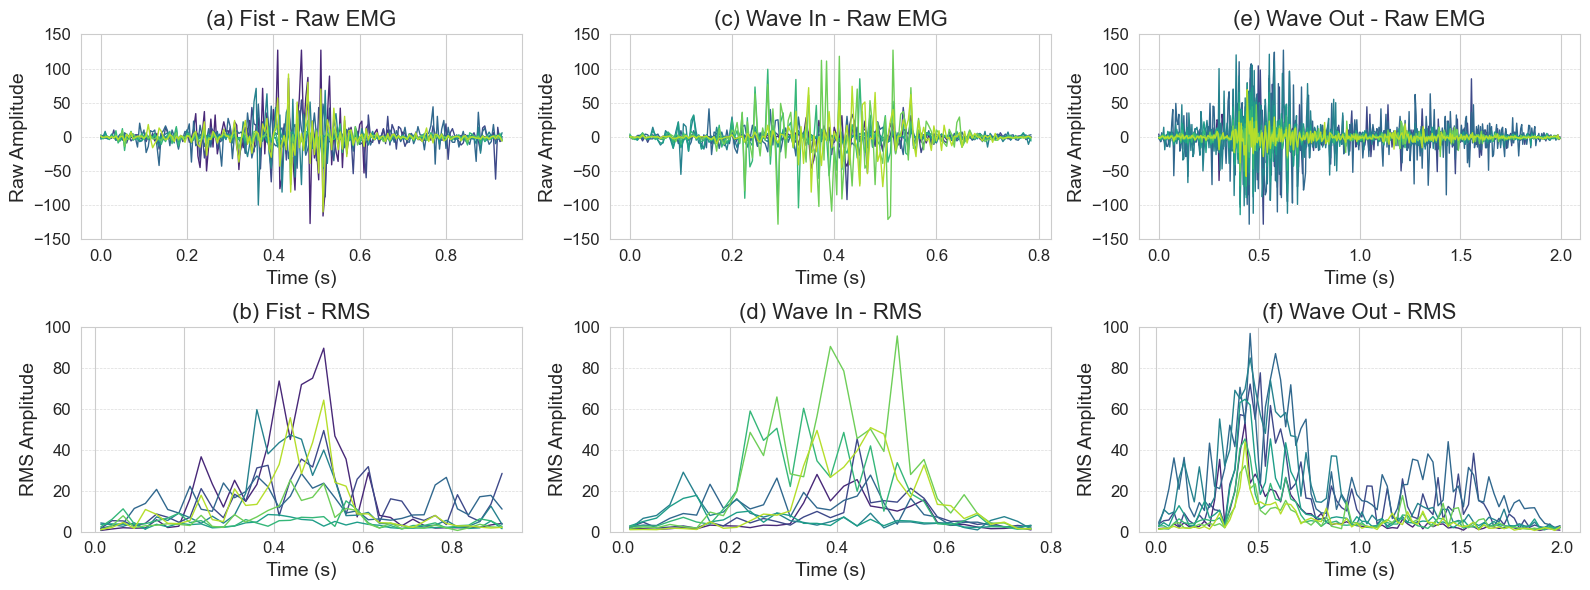

In [ ]:
raw_titles = ['(a) Fist - Raw EMG', '(c) Wave In - Raw EMG', '(e) Wave Out - Raw EMG']
rms_titles = ['(b) Fist - RMS', '(d) Wave In - RMS', '(f) Wave Out - RMS']

plot_emg_gesture_overlay('C:\\Users\\jrath\Documents\\discrete-hand-gesture-recognition\\raw_data\\EMG-EPN612\\trainingJSON\\user1\\user1.h5', ['idx_26', 'idx_120', 'idx_150'], raw_titles, rms_titles, 'emg_gestures.png')

## EEG Data

In [2]:
from dataset.eeg_motor_movement import load_data
import torch
import os

In [36]:
def get_eegwindows_rms( eeg_data):   
    rms_windows = []    
    window_samples = 4
    num_windows = 160
    for i in range(num_windows):
        # calculate start and end point for window
        start = i * window_samples
        end = start + window_samples          
        segment = eeg_data[:, start:end]
        # Compute RMS for each channel in the window
        segment = segment
        rms_feature = np.sqrt(np.mean(np.square(segment.cpu().numpy()), axis=1))  
        rms_windows.append(rms_feature)
    windows_np = np.array(rms_windows) 
    # return windows tensor of consistent shape and true number of windows (without padding) 
    return torch.tensor(windows_np, dtype=torch.float32), window_samples, window_samples

def plot_eeg_gesture_overlay(gestures, raw_titles, rms_titles, save_path, figsize=(16, 6)):

    sns.set_style("whitegrid")
    num_gestures = len(gestures)
    # Create a figure with 2 rows (Raw, RMS) and num_gestures columns
    fig, axes = plt.subplots(2, num_gestures, figsize=figsize, 
                             gridspec_kw={'height_ratios': [1, 1]})

    # If only one gesture, ensure axes is 2D (2 rows, 1 column)
    if num_gestures == 1:
        axes = axes.reshape(2, 1)

    for col, (raw, raw_title, rms_title) in enumerate(zip(gestures, raw_titles, rms_titles)):
        # Load raw EMG data
        # raw = np.array(raw)
        raw = torch.tensor(raw, dtype=torch.float32)

        if raw.ndim == 3 and raw.shape[0] == 1:
            raw = raw.squeeze(0)
        
        # Select channels if provided


        n_chans = raw.shape[0]
        n_chans=8
        ch_names = [f"Ch {i+1}" for i in range(n_chans)]
        
        n_chans, n_samples = raw.shape
        n_chans=8
        t = np.arange(n_samples) / 160

        # Compute RMS windows
        selected_channels = [43, 59, 54, 20, 45, 53, 58, 52]
        selected_channels = [3, 10, 4, 11, 33, 34, 18, 2]
        rms_tensor, window_samples, step_samples = get_eegwindows_rms(raw[selected_channels, :])
        rms_data = rms_tensor.numpy()
        num_windows = rms_data.shape[0]
        t_rms = (np.arange(num_windows) * step_samples + window_samples / 2) / 160

        # selected_channels = [43, 59, 54, 20, 45, 53, 58, 52] # rms 0.025 ['T10', 'Po8', 'P8', 'Cp6', 'Tp8', 'P6', 'Po4', 'P4']
        # rms_data = rms_data[selected_channels, :]
    
        selected_channels = [3, 10, 4, 11, 33, 34, 18, 2] # default ['Fcz', 'Cz', 'Fc2', 'C2', 'Fz', 'F2', 'Cp2', 'Fc1']
        raw = raw[selected_channels, :]

        # Plot raw EMG on top row at column j
        ax_raw = axes[0, col]
        palette_raw = sns.color_palette("viridis", n_chans)
        for ch_i, name in enumerate(ch_names):
            ax_raw.plot(t, raw[ch_i], label=name, color=palette_raw[ch_i], linewidth=1.0)
        ax_raw.set_ylabel('Raw Amplitude', fontsize=14)
        ax_raw.set_xlabel('Time (s)', fontsize=14)
        ax_raw.set_title(raw_title, fontsize=16)
        ax_raw.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
        ax_raw.tick_params(labelsize=12)
        ax_raw.set_ylim(-4, 4)
        

        # Plot RMS on bottom row at column j
        ax_rms = axes[1, col]
        palette_rms = sns.color_palette("viridis", n_chans)
        for ch_i, name in enumerate(ch_names):
            ax_rms.plot(t_rms, rms_data[:, ch_i], label=name, color=palette_rms[ch_i], linewidth=1.0)
        ax_rms.set_ylabel('RMS Amplitude', fontsize=14)
        ax_rms.set_xlabel('Time (s)', fontsize=14)
        ax_rms.set_title(rms_title, fontsize=16)
        ax_rms.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
        ax_rms.tick_params(labelsize=12)
        ax_rms.set_ylim(0, 3)
        

    plt.tight_layout()
    os.makedirs(os.path.dirname(PLOTS_PATH + save_path), exist_ok=True)
    plt.savefig(PLOTS_PATH + save_path, dpi=600, bbox_inches='tight')
    plt.show()

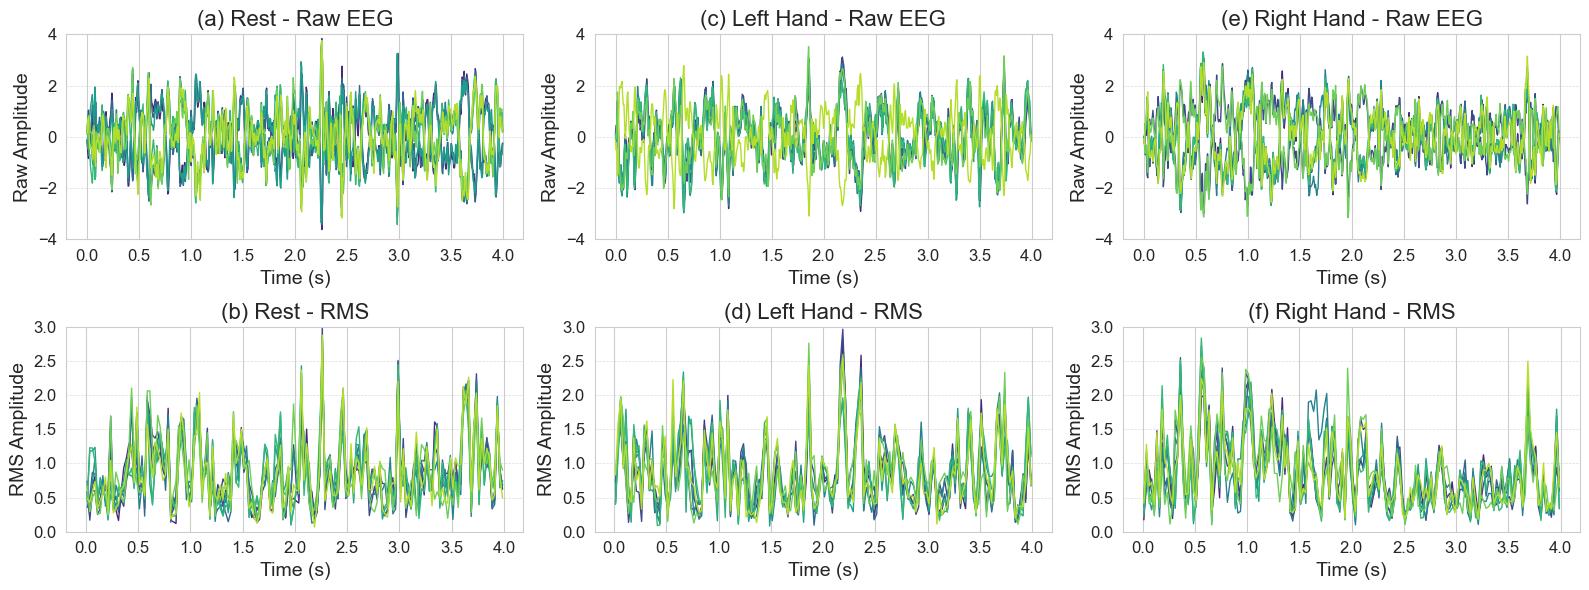

In [38]:
X, y = load_data(nr_of_subj=1, chunk_data=False, chunks=8, cpu_format=False,
                preprocessing=True, hp_freq=0.5, bp_low=2, bp_high=60, notch=True,
                hp_filter=False, bp_filter=True, artifact_removal=True)

gestures = [X[-1], X[-2], X[-8]]
raw_titles = ['(a) Rest - Raw EEG', '(c) Left Hand - Raw EEG', '(e) Right Hand - Raw EEG']
rms_titles = ['(b) Rest - RMS', '(d) Left Hand - RMS', '(f) Right Hand - RMS']

plot_eeg_gesture_overlay(gestures, raw_titles, rms_titles, 'eeg_gestures.png')